# DIGIT CLASSIFICATION SYSTEM

In [ ]:
!pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

train = pd.read_csv(r"C:\Users\s eshwar\OneDrive\Desktop\train.csv")
test = pd.read_csv(r"C:\Users\s eshwar\OneDrive\Desktop\test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


# LABEL COUNT

In [ ]:
train['label'].value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

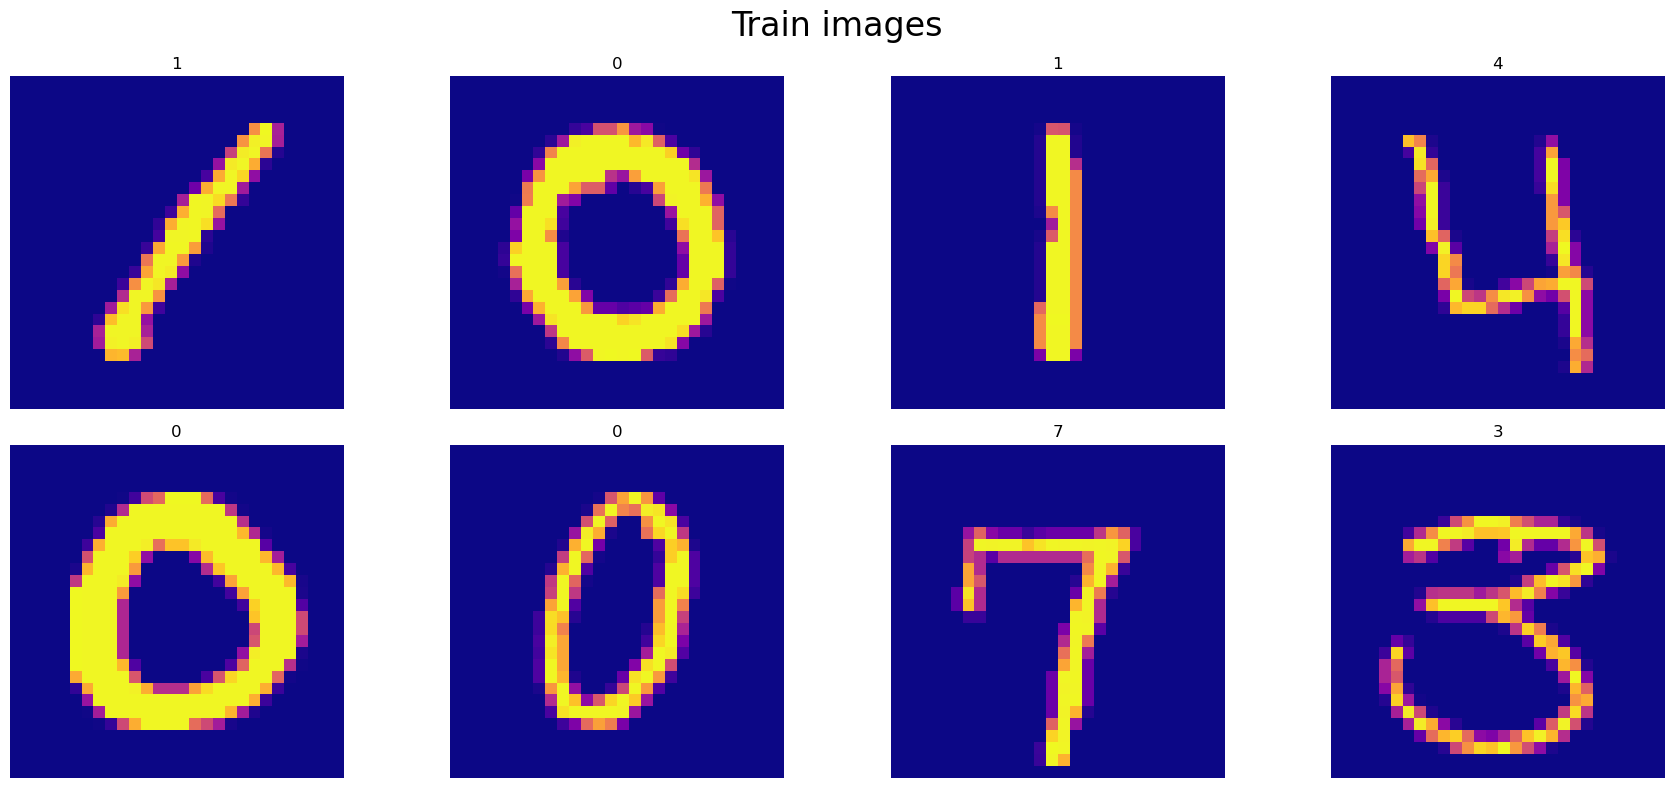

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle('Train images', fontsize=24)

for ind, ax in enumerate(axes.flatten()):
    ax.set_title(train.iloc[ind, 0])
    img = train.iloc[ind, 1:].values.reshape(28, 28)
    ax.imshow(img, cmap='plasma')
    ax.axis('off')

plt.tight_layout()
plt.show()

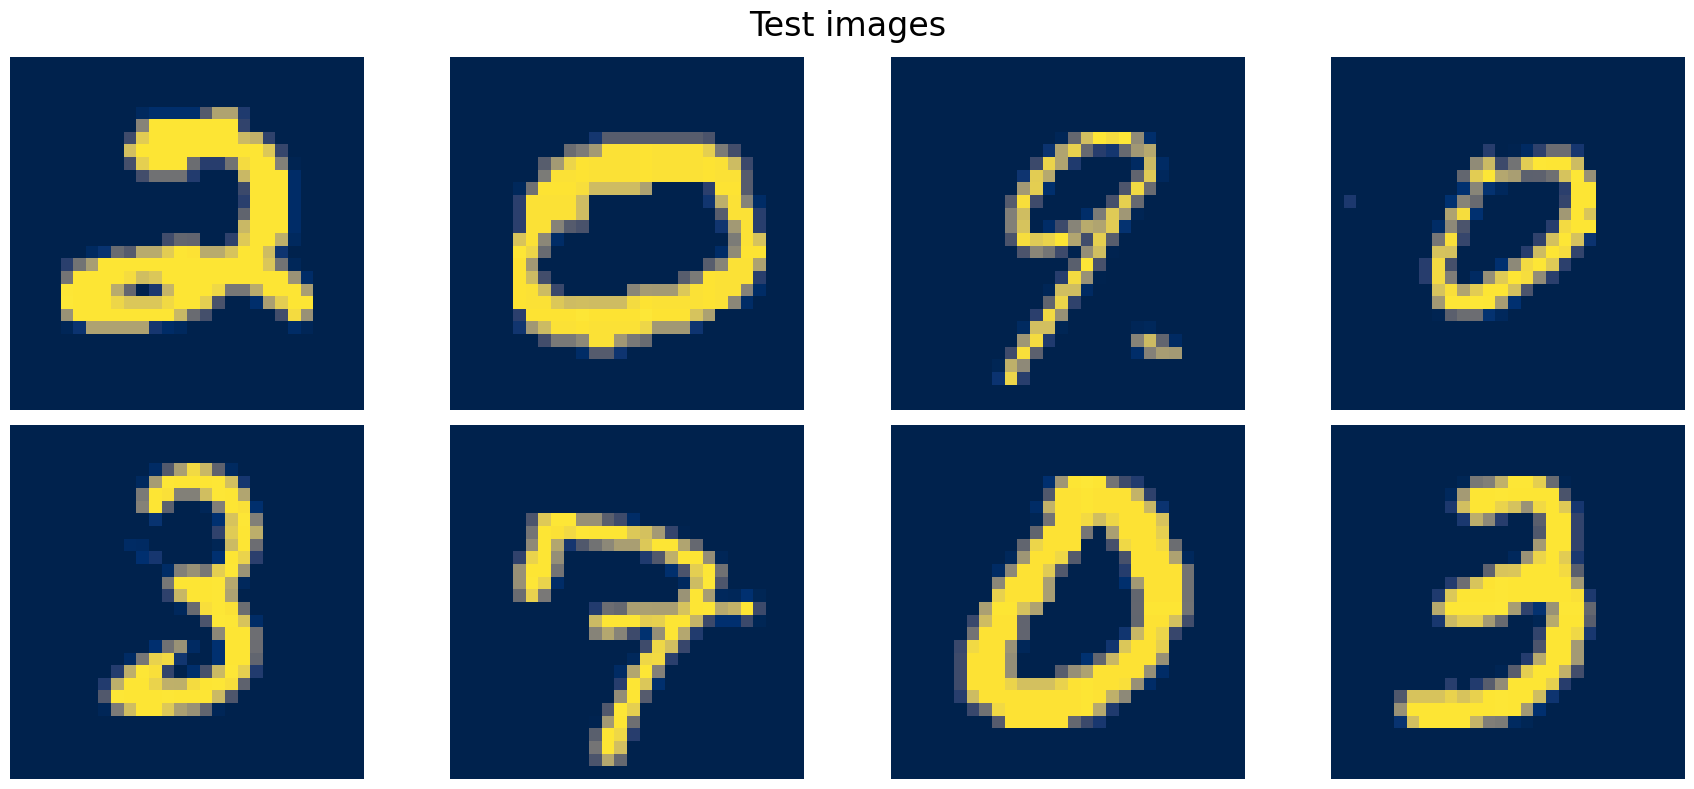

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.suptitle('Test images', fontsize=24)

for ind, ax in enumerate(axes.flatten()):
    img = test.iloc[ind, :].values.reshape(28, 28)
    ax.imshow(img, cmap='cividis')
    ax.axis('off')

plt.tight_layout()
plt.show()


# PREPROCESSING

In [ ]:
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


In [ ]:
X = X / 255.0
test = test / 255.0

print(X.shape)
print(test.shape)


X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)
(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
print(y.shape)
print(y[0])

y_enc = to_categorical(y, num_classes = 10)

print(y_enc.shape)
print(y_enc[0])

(42000,)
1
(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
random_seed = 3

X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


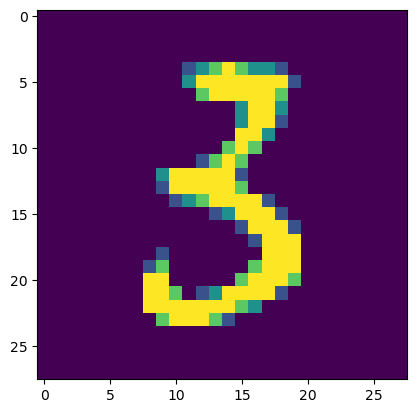

In [ ]:
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


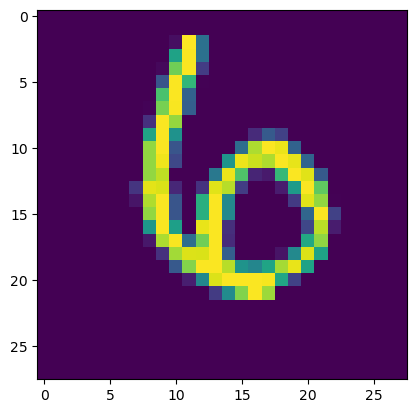

In [ ]:
g = plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

# CNN MODEL

In [ ]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2


model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

C:\Users\s eshwar\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train_enc,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=VERBOSE,validation_split=0.3)

Epoch 1/10
161/161 - 4s - 23ms/step - accuracy: 0.8092 - loss: 0.5917 - val_accuracy: 0.9563 - val_loss: 0.1380
Epoch 2/10
161/161 - 2s - 13ms/step - accuracy: 0.9548 - loss: 0.1519 - val_accuracy: 0.9736 - val_loss: 0.0818
Epoch 3/10
161/161 - 2s - 15ms/step - accuracy: 0.9683 - loss: 0.1020 - val_accuracy: 0.9802 - val_loss: 0.0676
Epoch 4/10
161/161 - 2s - 15ms/step - accuracy: 0.9771 - loss: 0.0779 - val_accuracy: 0.9803 - val_loss: 0.0604
Epoch 5/10
161/161 - 2s - 15ms/step - accuracy: 0.9807 - loss: 0.0641 - val_accuracy: 0.9848 - val_loss: 0.0501
Epoch 6/10
161/161 - 2s - 15ms/step - accuracy: 0.9842 - loss: 0.0513 - val_accuracy: 0.9847 - val_loss: 0.0497
Epoch 7/10
161/161 - 3s - 16ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9861 - val_loss: 0.0479
Epoch 8/10
161/161 - 3s - 16ms/step - accuracy: 0.9891 - loss: 0.0366 - val_accuracy: 0.9844 - val_loss: 0.0511
Epoch 9/10
161/161 - 3s - 22ms/step - accuracy: 0.9897 - loss: 0.0339 - val_accuracy: 0.9862 - val_loss:

# ACCURACY

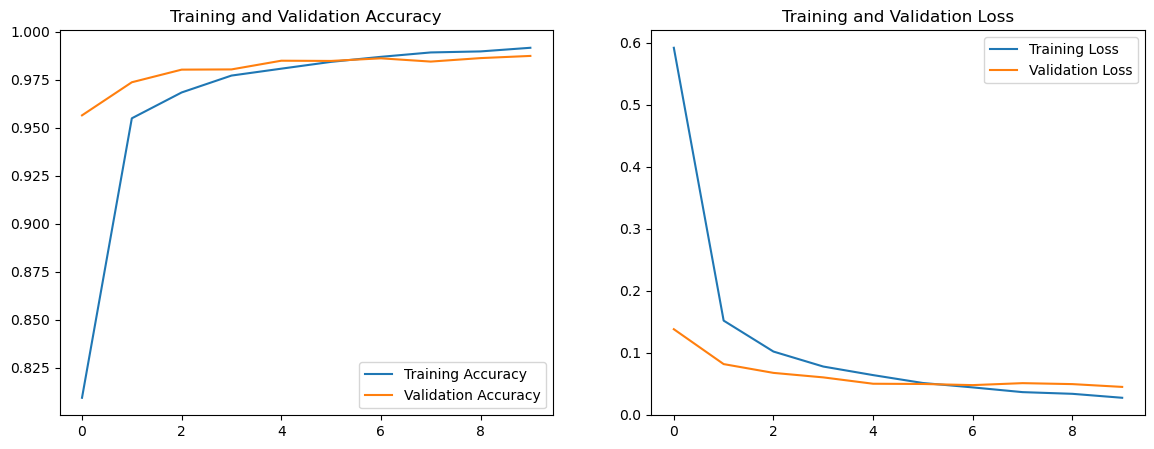

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.9853814e-10 4.6520859e-10 4.4974618e-11 7.3876706e-08 6.3817476e-09
 9.9999964e-01 2.6943447e-08 1.1005603e-11 3.8708759e-08 1.4785272e-07]
5


In [ ]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1260
           1       1.00      0.99      0.99      1376
           2       0.98      0.98      0.98      1239
           3       0.99      0.98      0.98      1297
           4       0.98      0.99      0.98      1200
           5       0.99      0.98      0.98      1150
           6       0.99      0.99      0.99      1205
           7       0.98      0.99      0.99      1357
           8       0.98      0.98      0.98      1258
           9       0.98      0.97      0.97      1258

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



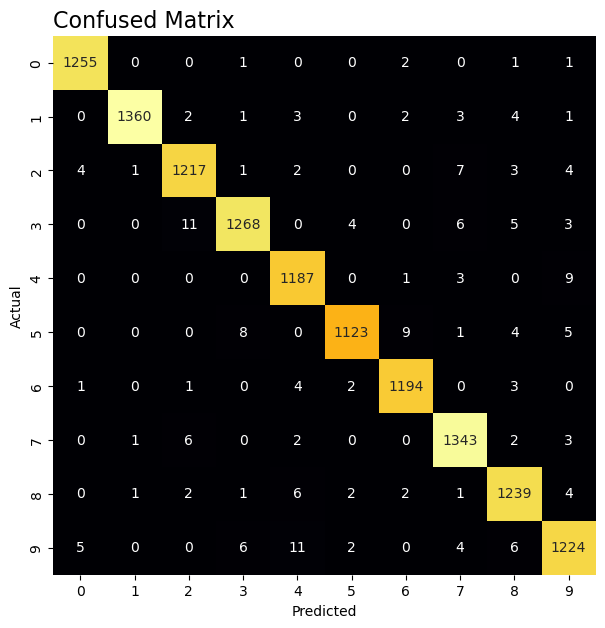

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='inferno', ax=ax)
ax.set_title('Confused Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# PREDICTING ON TEST

In [ ]:

y_pred_enc = model.predict(test)


y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[4.3070650e-10 2.2043530e-10 9.9999940e-01 7.8353929e-10 5.6797379e-12
 1.7962780e-13 1.1111356e-11 5.4963749e-07 2.4838263e-09 2.5535286e-12]
2


C:\Users\s eshwar\AppData\Local\Temp\ipykernel_12916\1795109823.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 5, ind+1)


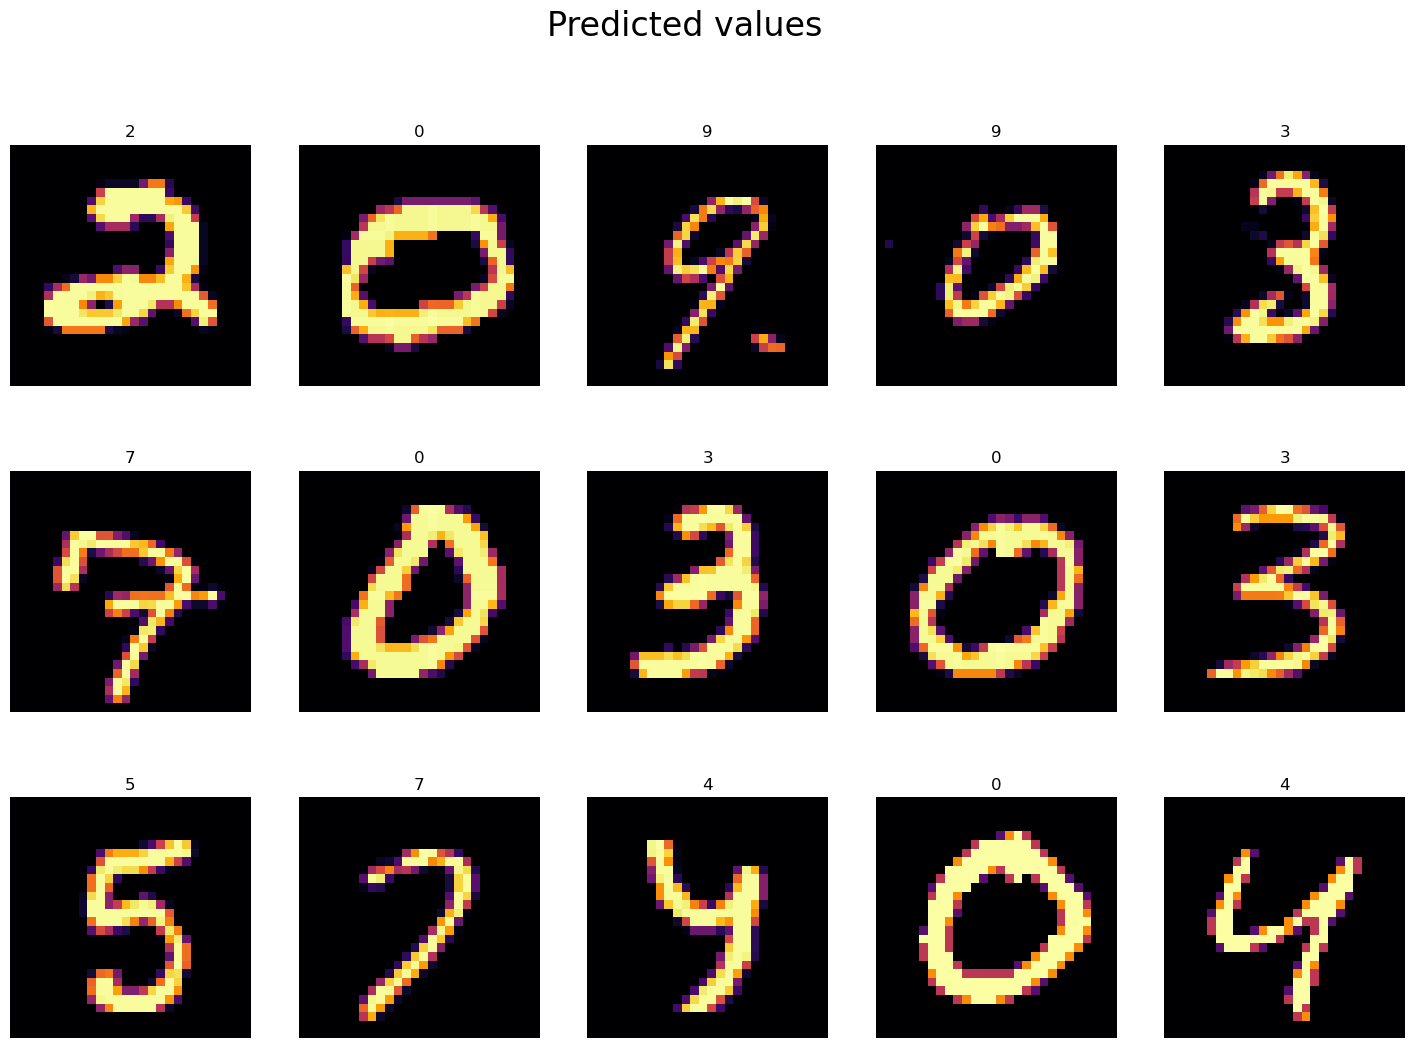

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='inferno')